# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv("/content/drive/My Drive/AI and ML Projects - Uploaded to Github/Predicting_Employee_Productivity_ML/"
                "garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df["department"].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


In [6]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

There is a hidden space in some of the "finishing" values so we will need to clean this!

In [7]:
df["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


Note that **quarter** in this dataset refers to a *portion of the month*, not a typical yearly quarter. Quarter 5 is for dates that fall on the 29th-31st.

In [8]:
df["day"].value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


There are no Friday values. This is interesting to note, but most-likely not something we need to worry about.

In [9]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


We can see, for instance, that the `actual_productivity` column actually surpasses the limit of 1 that was indicated on the dataset description!

The max value for `over_time` is very large. This is potentially something to consider.

In [10]:
df[df["actual_productivity"] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


In [11]:
df[df["wip"].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


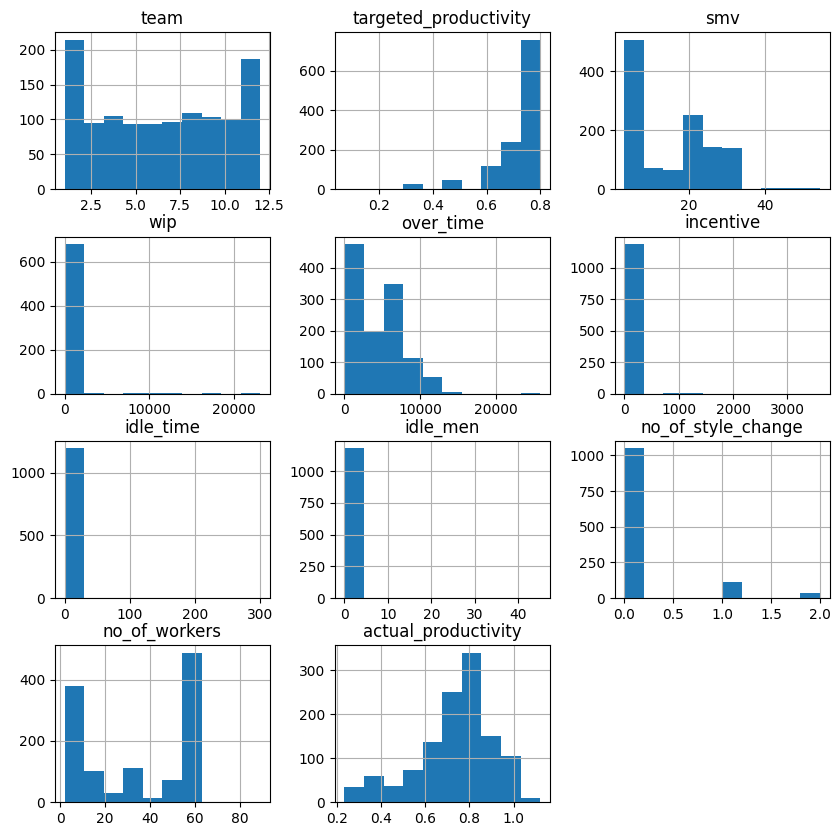

In [12]:
df.hist(figsize=(10,10))
plt.show()

- `idle_time` and `idle_men` appear to have few non-zero values. consider dropping

In [ ]:
print(len(df[(df["idle_time"] > 0)]))
print(len(df[(df["idle_men"] > 0)]))

18
18


we can remove both this columns because there are very few non-zero values

## Data cleaning

In [13]:
# cleaning extra space in department column
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df.loc[df["department"] == "sweing", "department"] = "sewing"
df["department"].value_counts()

,count
department,
sewing,691
finishing,506


In [14]:
# removing date column (due to short time frame, probably not useful for our model)
# removing idle_time and idle_men due to few non-zero values
# removing wip due to many null values
# removing no_of_style_change due to few non-zero values
df = df.drop(["date", "idle_time", "idle_men", "wip", "no_of_style_change"], axis=1)

df.head(3)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570


In [15]:
# merging Quarter 5 with Quarter 4 because it covers so few values on its own
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,292
Quarter3,210


In [16]:
# making quarter numeric
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

,count
quarter,
1,360
2,335
4,292
3,210


In [17]:
df["quarter"] = df["quarter"].astype("int")
df[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [18]:
# number of workers is currently a float, but can't have a fraction of a worker. convert to int
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(3)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500
2,1,sewing,Thursday,11,0.80,11.41,3660,50,30,0.800570


In [19]:
# "actual_productivity" should feature two decimals, just like "targeted_productivity"
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


In [20]:
# setting new column for classifer based on whether targeted productivity was reached
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10, random_state=14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sewing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sewing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True
307,3,sewing,Sunday,10,0.70,22.52,10080,40,56,0.70,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,True
1123,2,sewing,Sunday,8,0.60,30.48,6720,0,56,0.60,True
877,4,sewing,Sunday,9,0.70,18.79,3240,30,57,0.63,False
950,4,sewing,Thursday,3,0.75,29.40,6840,45,57,0.75,True


## ML Prep

In [21]:
# convert department column to boolean
df = df.rename(columns={"department": "dept_sewing"})
df["dept_sewing"] = df["dept_sewing"].map({"finishing": 0, "sewing": 1}).astype("int64")
df.head(10)

,quarter,dept_sewing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,1,1,Thursday,8,0.80,26.16,7080,98,59,0.94,True
1,1,0,Thursday,1,0.75,3.94,960,0,8,0.89,True
2,1,1,Thursday,11,0.80,11.41,3660,50,30,0.80,True
3,1,1,Thursday,12,0.80,11.41,3660,50,30,0.80,True
4,1,1,Thursday,6,0.80,25.90,1920,50,56,0.80,True
5,1,1,Thursday,7,0.80,25.90,6720,38,56,0.80,True
6,1,0,Thursday,2,0.75,3.94,960,0,8,0.76,True
7,1,1,Thursday,3,0.75,28.08,6900,45,57,0.75,True
8,1,1,Thursday,2,0.75,19.87,6000,34,55,0.75,True
9,1,1,Thursday,1,0.75,28.08,6900,45,57,0.75,True


In [22]:
# make quarter column into dummies (numeric order is *not* actually part of these values so they should be categorical)
df = pd.concat([df, pd.get_dummies(df["quarter"], prefix="q")], axis=1).drop(["quarter"], axis=1)
df.sample(10, random_state=14)

,dept_sewing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
959,0,Thursday,10,0.70,2.90,3360,0,8,0.41,False,False,False,False,True
464,0,Tuesday,8,0.65,3.94,960,0,8,0.85,True,False,False,False,True
672,1,Sunday,7,0.70,24.26,6960,0,58,0.36,False,False,True,False,False
321,1,Monday,6,0.80,11.41,4380,50,31,0.80,True,False,False,True,False
282,0,Saturday,9,0.80,3.94,1800,0,10,0.83,True,False,False,True,False
307,1,Sunday,10,0.70,22.52,10080,40,56,0.70,True,False,False,True,False
609,0,Wednesday,9,0.75,3.94,960,0,8,0.76,True,True,False,False,False
1123,1,Sunday,8,0.60,30.48,6720,0,56,0.60,True,False,True,False,False
877,1,Sunday,9,0.70,18.79,3240,30,57,0.63,False,False,False,False,True
950,1,Thursday,3,0.75,29.40,6840,45,57,0.75,True,False,False,False,True


In [23]:
# day column to dummies
df = pd.concat([df, pd.get_dummies(df["day"], prefix=None)], axis=1).drop(["day"], axis=1)
df.sample(10, random_state=14)

,dept_sewing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,0.70,2.90,3360,0,8,0.41,False,False,False,False,True,False,False,False,True,False,False
464,0,8,0.65,3.94,960,0,8,0.85,True,False,False,False,True,False,False,False,False,True,False
672,1,7,0.70,24.26,6960,0,58,0.36,False,False,True,False,False,False,False,True,False,False,False
321,1,6,0.80,11.41,4380,50,31,0.80,True,False,False,True,False,True,False,False,False,False,False
282,0,9,0.80,3.94,1800,0,10,0.83,True,False,False,True,False,False,True,False,False,False,False
307,1,10,0.70,22.52,10080,40,56,0.70,True,False,False,True,False,False,False,True,False,False,False
609,0,9,0.75,3.94,960,0,8,0.76,True,True,False,False,False,False,False,False,False,False,True
1123,1,8,0.60,30.48,6720,0,56,0.60,True,False,True,False,False,False,False,True,False,False,False
877,1,9,0.70,18.79,3240,30,57,0.63,False,False,False,False,True,False,False,True,False,False,False
950,1,3,0.75,29.40,6840,45,57,0.75,True,False,False,False,True,False,False,False,True,False,False


In [24]:
# team column to dummies
df = pd.concat([df, pd.get_dummies(df["team"], prefix="team")], axis=1).drop(["team"], axis=1)
df.sample(10, random_state=14)

,dept_sewing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,0.70,2.90,3360,0,8,0.41,False,False,False,...,False,False,False,False,False,False,False,True,False,False
464,0,0.65,3.94,960,0,8,0.85,True,False,False,...,False,False,False,False,False,True,False,False,False,False
672,1,0.70,24.26,6960,0,58,0.36,False,False,True,...,False,False,False,False,True,False,False,False,False,False
321,1,0.80,11.41,4380,50,31,0.80,True,False,False,...,False,False,False,True,False,False,False,False,False,False
282,0,0.80,3.94,1800,0,10,0.83,True,False,False,...,False,False,False,False,False,False,True,False,False,False
307,1,0.70,22.52,10080,40,56,0.70,True,False,False,...,False,False,False,False,False,False,False,True,False,False
609,0,0.75,3.94,960,0,8,0.76,True,True,False,...,False,False,False,False,False,False,True,False,False,False
1123,1,0.60,30.48,6720,0,56,0.60,True,False,True,...,False,False,False,False,False,True,False,False,False,False
877,1,0.70,18.79,3240,30,57,0.63,False,False,False,...,False,False,False,False,False,False,True,False,False,False
950,1,0.75,29.40,6840,45,57,0.75,True,False,False,...,True,False,False,False,False,False,False,False,False,False


## Building the Tree

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [26]:
# Feature and target columns

X = df.drop(["actual_productivity", "productive"], axis=1)
y = df["productive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=24)

In [27]:
tree = DecisionTreeClassifier(max_depth=3, random_state=24)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

In [28]:
y_pred = tree.predict(X_test)

## Visualizing and Evaluating the Tree

In [29]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.85


In [30]:
tree.classes_

array([False,  True])

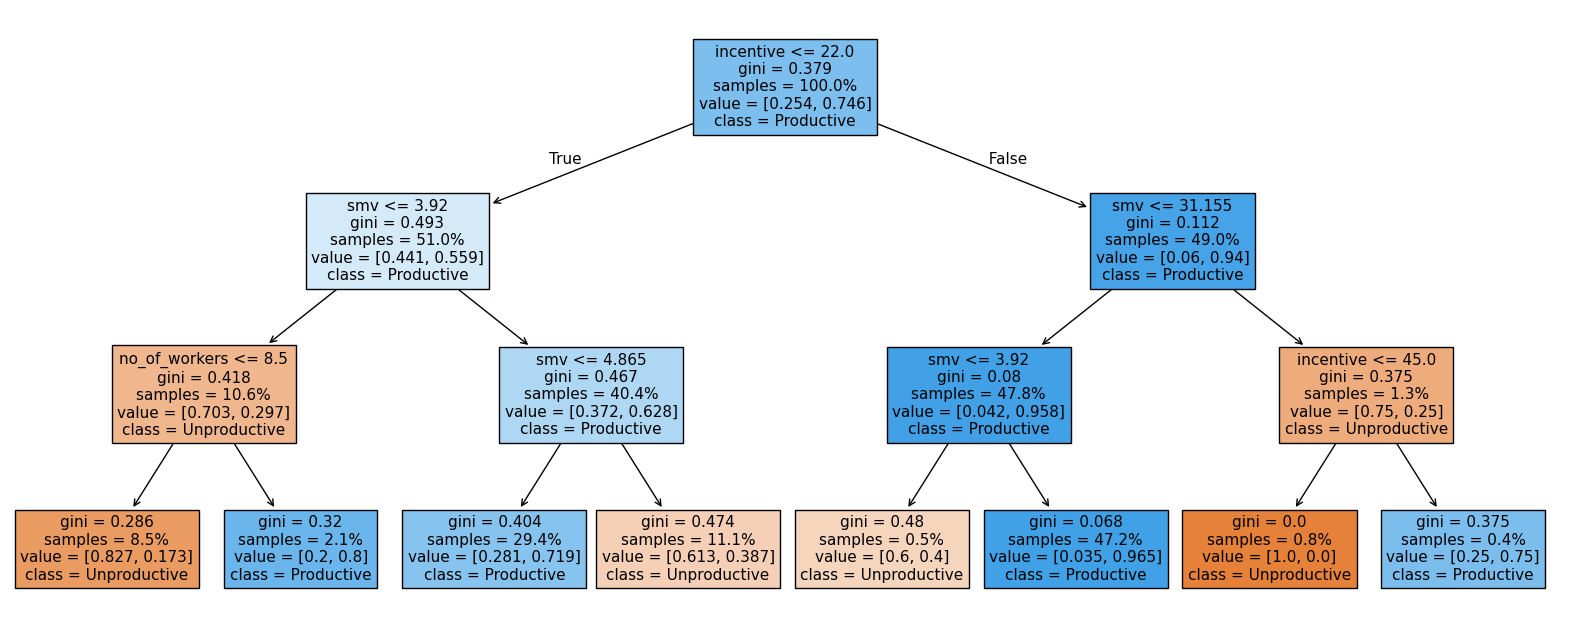

In [31]:
plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree,
              feature_names=X.columns,
              class_names=["Unproductive", "Productive"],
              filled=True,
              rounded=False,
              proportion=True,
              fontsize=11)

- `smv`: standard minute value — the allocated time for a task  
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 35,  24],
       [ 13, 168]])

[[True Negatives, False Positives],

[False Negatives, True Positives]]

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))
print("----")
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Precision: 0.88
Recall: 0.93
F1 Score: 0.9
----
Accuracy: 0.85


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2))
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]
Mean Cross Validation Score: 0.82


In [ ]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree,
                             X, y, cv=10,
                             scoring= ("precision", "recall", "f1") )

print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.85
Mean Cross Validated recall: 0.92
Mean Cross Validated F1: 0.88


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score=True,
                                random_state=24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.85


In [ ]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83
